# 11. Hierarchical clustering

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance

## 11.4 Implementations with scipy

In [5]:
X_ = np.array([2, 11, 5, 1, 7])
X = X_[:, None]

In [6]:
# Shortest distance method

# Distance matrix
D = scipy.spatial.distance.pdist(X, 'cityblock')
print(scipy.spatial.distance.squareform(D))

[[ 0.  9.  3.  1.  5.]
 [ 9.  0.  6. 10.  4.]
 [ 3.  6.  0.  4.  2.]
 [ 1. 10.  4.  0.  6.]
 [ 5.  4.  2.  6.  0.]]


In [7]:
# Clustering
Z = scipy.cluster.hierarchy.linkage(D, 'single')
print(Z)

[[0. 3. 1. 2.]
 [2. 4. 2. 2.]
 [5. 6. 3. 4.]
 [1. 7. 4. 5.]]


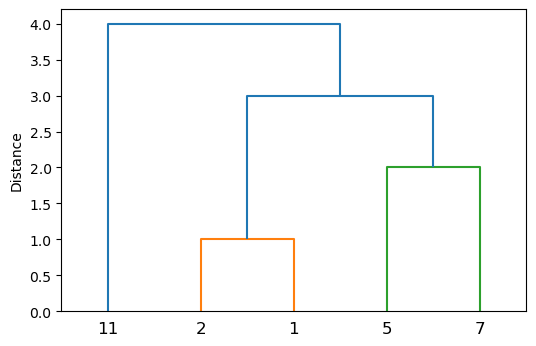

In [8]:
# Dendrogram
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

In [9]:
# Set threshold
print(X_)
print(f'Threshold = 1.5: {scipy.cluster.hierarchy.fcluster(Z, t=1.5, criterion="distance")}')
print(f'Threshold = 2.5: {scipy.cluster.hierarchy.fcluster(Z, t=2.5, criterion="distance")}')
print(f'Threshold = 3.5: {scipy.cluster.hierarchy.fcluster(Z, t=3.5, criterion="distance")}')
print(f'Threshold = 4.5: {scipy.cluster.hierarchy.fcluster(Z, t=4.5, criterion="distance")}')

[ 2 11  5  1  7]
Threshold = 1.5: [1 4 2 1 3]
Threshold = 2.5: [1 3 2 1 2]
Threshold = 3.5: [1 2 1 1 1]
Threshold = 4.5: [1 1 1 1 1]


In [10]:
# Set number of clusters
print(scipy.cluster.hierarchy.fcluster(Z, t=3, criterion='maxclust'))

[1 3 2 1 2]


[[ 0.  3.  1.  2.]
 [ 2.  4.  2.  2.]
 [ 1.  6.  6.  3.]
 [ 5.  7. 10.  5.]]


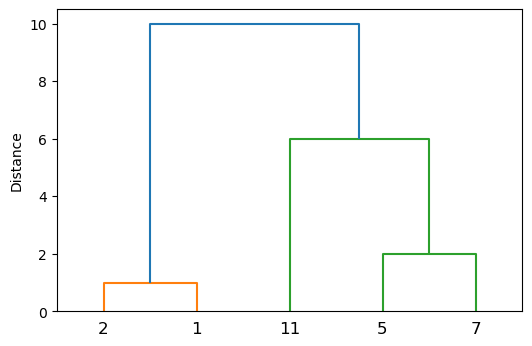

In [11]:
# Longest distance method
Z = scipy.cluster.hierarchy.linkage(X, 'complete', metric='cityblock')
print(Z)

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

## 11.5 Implementations by myself

In [12]:
X_ = np.array([2, 11, 5, 1, 7])
X = X_.reshape(-1, 1)
X

array([[ 2],
       [11],
       [ 5],
       [ 1],
       [ 7]])

In [13]:
def distance_matrix_l1(X):
    return np.abs(X - X.reshape(-1)).astype(float)

In [14]:
distance_matrix_l1(X)

array([[ 0.,  9.,  3.,  1.,  5.],
       [ 9.,  0.,  6., 10.,  4.],
       [ 3.,  6.,  0.,  4.,  2.],
       [ 1., 10.,  4.,  0.,  6.],
       [ 5.,  4.,  2.,  6.,  0.]])

In [15]:
# Shortest method
def single_linkage(D):
    C = np.ones(len(D) * 2 - 1) # C[k] = |Ck|
    Z = np.zeros((len(D) - 1, 4), dtype=float) # results of clustering
    M = np.pad(D, (0, len(D) - 1), constant_values=np.inf) # Extended distance matrix
    np.fill_diagonal(M, np.inf)

    print("* t=0")
    print(M)

    for t in range(len(D), 2 * len(D) - 1):

        # Find the pair of the closest clusters
        S = M[:t, :t]
        i, j = np.unravel_index(np.argmin(S), S.shape)
        print('argmin =', (i, j))

        # Record the number of elements in the new cluster
        C[t] = C[i] + C[j]

        # Record the new cluster
        Z[t-len(D)] = (i, j, S[i, j], C[t])

        # Remove the distance between i and j
        M[i, j] = np.inf
        M[j, i] = np.inf

        # Compute distance between the new cluster and the others
        M[t] = np.minimum(M[i], M[j])
        M[:, t] = np.minimum(M[:, i], M[:, j])

        # Remove the distance for clusters i and j
        M[i] = np.inf
        M[j] = np.inf
        M[:, i] = np.inf
        M[:, j] = np.inf

        # Show result
        print(f'* t={t}')
        print(M)
    
    return Z

In [16]:
D = distance_matrix_l1(X)
Z = single_linkage(D)

* t=0
[[inf  9.  3.  1.  5. inf inf inf inf]
 [ 9. inf  6. 10.  4. inf inf inf inf]
 [ 3.  6. inf  4.  2. inf inf inf inf]
 [ 1. 10.  4. inf  6. inf inf inf inf]
 [ 5.  4.  2.  6. inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]]
argmin = (0, 3)
* t=5
[[inf inf inf inf inf inf inf inf inf]
 [inf inf  6. inf  4.  9. inf inf inf]
 [inf  6. inf inf  2.  3. inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf  4.  2. inf inf  5. inf inf inf]
 [inf  9.  3. inf  5. inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]]
argmin = (2, 4)
* t=6
[[inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf  9.  4. inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf]
 [inf  9. inf inf inf inf  3. inf inf]
 [inf  4. in

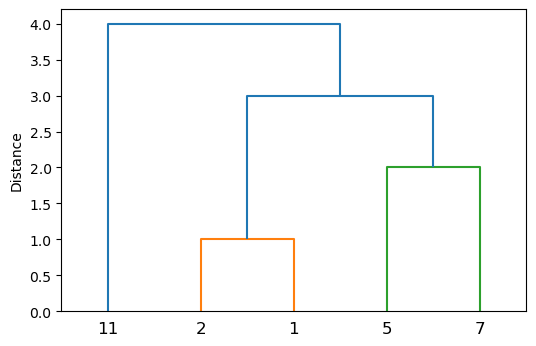

In [17]:
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(X_), ax=ax)
ax.set_ylabel("Distance")
plt.show()

## 11.6 Exercise

In [18]:
import pandas as pd

df = pd.read_csv('SSDSE-C-2021.csv', encoding='SHIFT=JIS')

df.info

<bound method DataFrame.info of    SSDSE-C-2021 Prefecture   City  LA03     LB00   LB01 LB011001 LB012001  \
0         地域コード       都道府県      市  世帯人員   食料（合計）  01　穀類        米      食パン   
1        R00000         全国     全国  2.97   960026  79312    23815     9860   
2        R01100        北海道    札幌市  2.91   939747  82676    31228     9075   
3        R02201        青森県    青森市  2.93   897288  73381    23652     8492   
4        R03201        岩手県    盛岡市  3.11   950535  80606    25033     8472   
5        R04100        宮城県    仙台市  3.03   968029  73349    20338     8630   
6        R05201        秋田県    秋田市  2.78   910130  67703    19704     6918   
7        R06201        山形県    山形市  3.14   983054  79164    26068     7478   
8        R07201        福島県    福島市  2.96   937721  73338    23738     7482   
9        R08201        茨城県    水戸市  2.88   924724  69248    19099     8878   
10       R09201        栃木県   宇都宮市  2.91   964692  76447    21578    10035   
11       R10201        群馬県    前橋市  2.84   93

In [19]:
X_pd = df.drop(['SSDSE-C-2021', 'Prefecture', 'City'], axis=1)
X = X_pd[2:].values.astype(float)
print(X.shape)
print(X[:2])

(47, 226)
[[2.91000e+00 9.39747e+05 8.26760e+04 3.12280e+04 9.07500e+03 1.81680e+04
  3.16200e+03 2.08200e+03 1.26600e+03 4.15200e+03 5.18900e+03 1.60900e+03
  7.26000e+02 6.64000e+02 1.93600e+03 3.42000e+03 8.44090e+04 4.89900e+03
  1.83000e+02 2.82000e+02 9.36000e+02 1.67200e+03 7.43100e+03 7.60000e+02
  1.08600e+03 5.22000e+02 1.26600e+03 2.08700e+03 1.41500e+03 3.40200e+03
  1.96800e+03 8.73500e+03 3.87800e+03 6.85000e+02 5.44000e+02 8.40000e+02
  2.40800e+03 8.07000e+02 3.09600e+03 2.40900e+03 8.48000e+02 2.35000e+02
  1.00600e+04 1.53800e+03 1.44200e+03 3.78800e+03 1.25800e+03 6.49000e+02
  5.10200e+03 5.92000e+02 2.96400e+03 4.62200e+03 8.89240e+04 1.24470e+04
  3.29400e+04 1.61860e+04 1.78100e+03 4.94400e+03 4.44900e+03 8.16600e+03
  3.46000e+03 4.55300e+03 4.36230e+04 1.30700e+04 1.14000e+03 1.11200e+04
  1.65900e+03 7.47600e+03 5.26000e+02 8.63200e+03 1.09625e+05 3.10000e+03
  2.64300e+03 1.64000e+03 3.32400e+03 2.49400e+03 2.26800e+03 1.08500e+03
  8.98000e+03 1.36600e+03 2.

In [22]:
df['Prefecture'].tolist()[2:]

['北海道',
 '青森県',
 '岩手県',
 '宮城県',
 '秋田県',
 '山形県',
 '福島県',
 '茨城県',
 '栃木県',
 '群馬県',
 '埼玉県',
 '千葉県',
 '東京都',
 '神奈川県',
 '新潟県',
 '富山県',
 '石川県',
 '福井県',
 '山梨県',
 '長野県',
 '岐阜県',
 '静岡県',
 '愛知県',
 '三重県',
 '滋賀県',
 '京都府',
 '大阪府',
 '兵庫県',
 '奈良県',
 '和歌山県',
 '鳥取県',
 '島根県',
 '岡山県',
 '広島県',
 '山口県',
 '徳島県',
 '香川県',
 '愛媛県',
 '高知県',
 '福岡県',
 '佐賀県',
 '長崎県',
 '熊本県',
 '大分県',
 '宮崎県',
 '鹿児島県',
 '沖縄県']

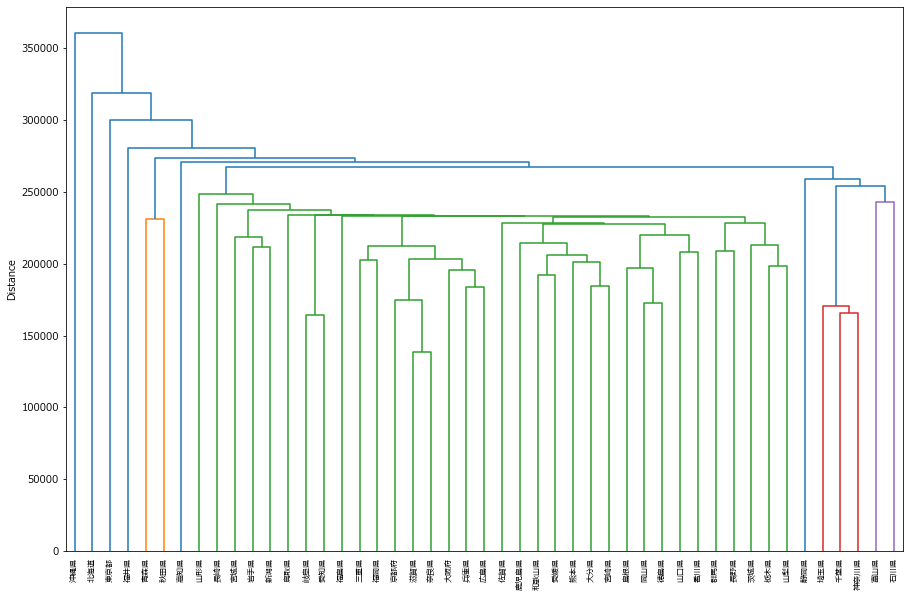

In [36]:
# Shortest distance method
Z = scipy.cluster.hierarchy.linkage(X, 'single', metric='cityblock')

fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['font.family'] = 'Meiryo'
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=df['Prefecture'].tolist()[2:], ax=ax)
ax.set_ylabel("Distance")
plt.show()

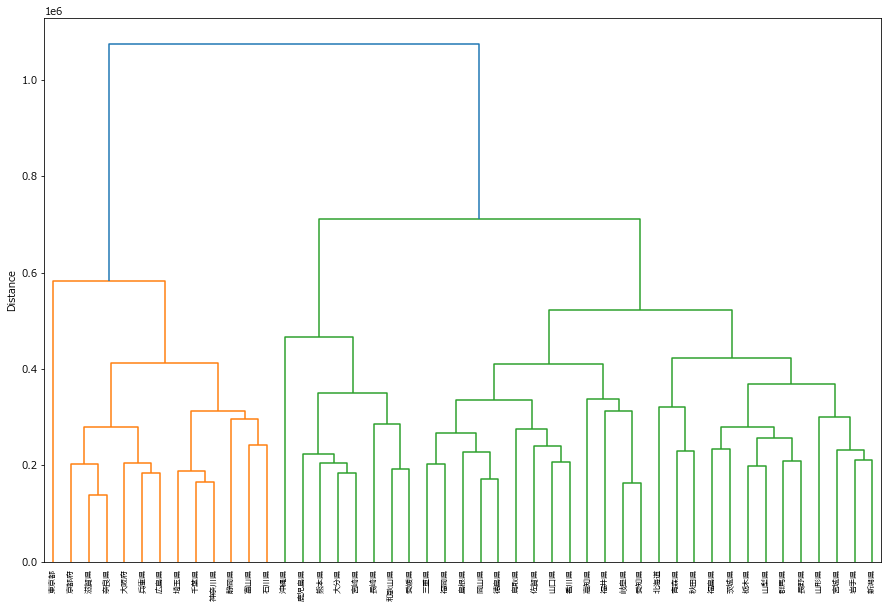

In [38]:
# Longest distance method
Z = scipy.cluster.hierarchy.linkage(X, 'complete', metric='cityblock')

fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['font.family'] = 'Meiryo'
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=df['Prefecture'].tolist()[2:], ax=ax)
ax.set_ylabel("Distance")
plt.show()

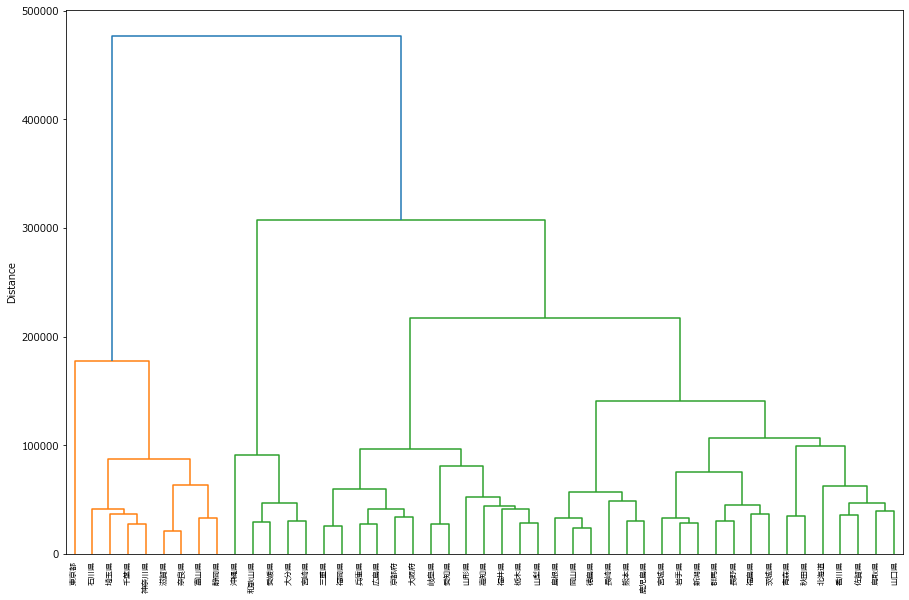

In [40]:
# Ward method
Z = scipy.cluster.hierarchy.linkage(X, 'ward', metric='euclidean')

fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['font.family'] = 'Meiryo'
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=df['Prefecture'].tolist()[2:], ax=ax)
ax.set_ylabel("Distance")
plt.show()